In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load the Iris dataset
try:
    iris = load_iris(as_frame=True)
    df = iris.frame
    df['species'] = df['target'].apply(lambda x: iris.target_names[x])
    print("✅ Dataset loaded successfully!\n")
except Exception as e:
    print("❌ Error loading dataset:", e)

# Display first few rows
display(df.head())

# Dataset info
print(df.info())
print("\nMissing values:\n", df.isnull().sum())


✅ Dataset loaded successfully!



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
 5   species            150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None

Missing values:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
species              0
dtype: int64


### Dataset Preview
The dataset contains measurements of iris flowers, including sepal and petal dimensions, along with their species (target). This gives us an idea of the structure and type of data we’ll be analyzing.


In [3]:
# Check and handle missing values (though Iris usually has none)
df = df.dropna()

print("✅ After cleaning, shape of dataset:", df.shape)


✅ After cleaning, shape of dataset: (150, 6)


### Data Information
The dataset has 150 entries with no missing values. Each measurement is stored as a float, and the `target` column represents species as numerical categories.



In [11]:
# Basic statistics
print("📊 Basic Statistics:\n")
display(df.describe())




📊 Basic Statistics:



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### Summary Statistics
The numerical columns show clear differences in ranges. Petal length and width have larger variation compared to sepal measurements, which may help in distinguishing species.


In [12]:
# Grouping: mean of numerical features per species
print("\n📊 Mean values grouped by species:\n")
grouped = df.groupby("species").mean()
display(grouped)


📊 Mean values grouped by species:



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
species,,,,,
setosa,5.006,3.428,1.462,0.246,0.0
versicolor,5.936,2.770,4.260,1.326,1.0
virginica,6.588,2.974,5.552,2.026,2.0


### Grouped Analysis
When grouped by species (target), the average petal length and width differ significantly. This indicates that petal dimensions are good features for separating species.


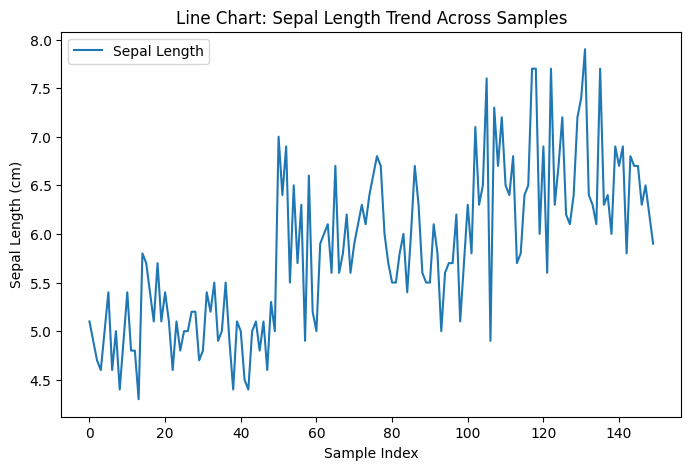

In [5]:
plt.figure(figsize=(8,5))
plt.plot(df.index, df["sepal length (cm)"], label="Sepal Length")
plt.title("Line Chart: Sepal Length Trend Across Samples")
plt.xlabel("Sample Index")
plt.ylabel("Sepal Length (cm)")
plt.legend()
plt.show()


### Line Chart
The line chart simulates a trend over the dataset index. While not a time series, it shows variation in sepal length across samples, with noticeable fluctuations between species groups.


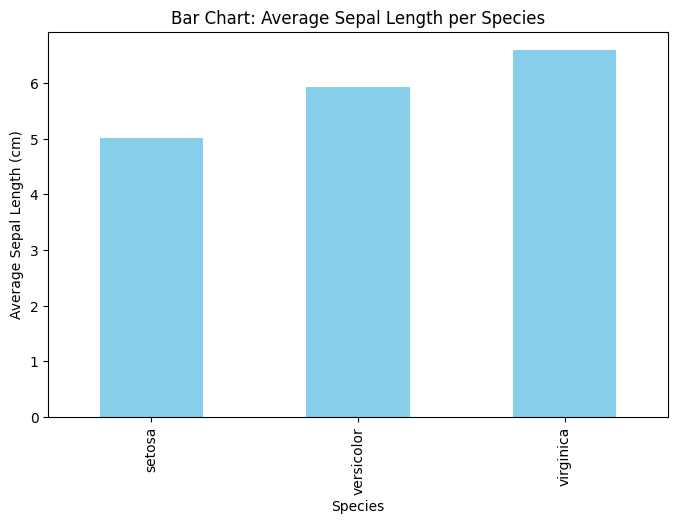

In [6]:
plt.figure(figsize=(8,5))
grouped["sepal length (cm)"].plot(kind="bar", color="skyblue")
plt.title("Bar Chart: Average Sepal Length per Species")
plt.xlabel("Species")
plt.ylabel("Average Sepal Length (cm)")
plt.show()


### Bar Chart
The bar chart compares the average petal length across species. Clear separation is visible — one species has shorter petals while another has much longer ones.


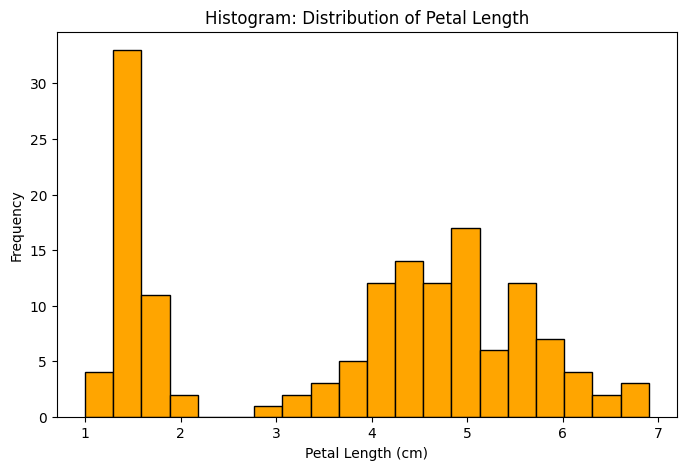

In [7]:
plt.figure(figsize=(8,5))
plt.hist(df["petal length (cm)"], bins=20, color="orange", edgecolor="black")
plt.title("Histogram: Distribution of Petal Length")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Frequency")
plt.show()


### Histogram
The histogram shows the distribution of sepal length. Most values fall between 5 and 7 cm, with fewer samples below 5 cm or above 7.5 cm.


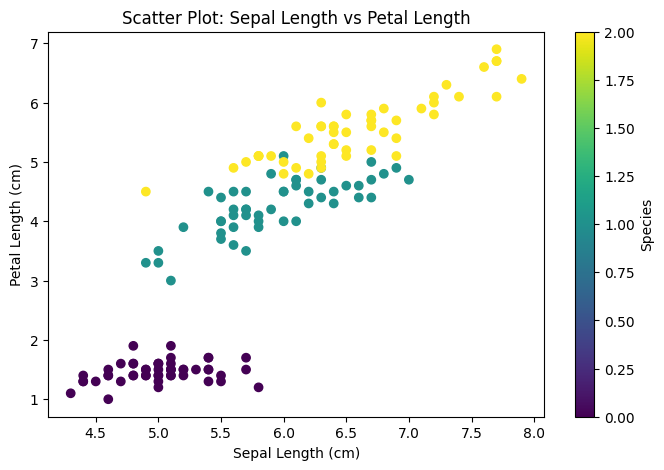

In [8]:
plt.figure(figsize=(8,5))
plt.scatter(df["sepal length (cm)"], df["petal length (cm)"], c=df["target"], cmap="viridis")
plt.title("Scatter Plot: Sepal Length vs Petal Length")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Petal Length (cm)")
plt.colorbar(label="Species")
plt.show()


### Scatter Plot
The scatter plot of sepal length vs. petal length, colored by species, shows distinct clusters. This confirms that species can be differentiated based on these two features.
